# Gaussian Mixture Models (GMMs)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


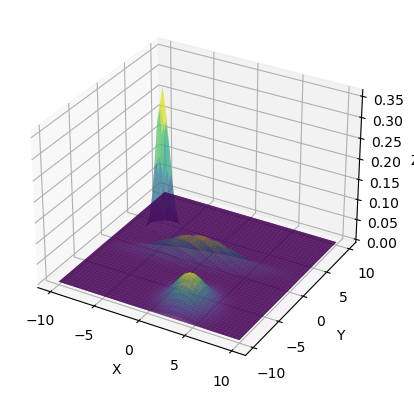

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Generate random data
np.random.seed(0)
n_samples = 300
C = np.array([[0., -0.7], [3.5, .7]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
          1.5 * np.random.randn(n_samples, 2) + np.array([3, -7])]

# Fit a Gaussian Mixture Model with three components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X)

# Create a grid of points
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X_grid, Y_grid = np.meshgrid(x, y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each Gaussian in the mixture
for i in range(clf.n_components):
    mean = clf.means_[i]
    cov = clf.covariances_[i]

    # Create multivariate normal distribution
    rv = multivariate_normal(mean, cov)

    # Calculate Z values for grid
    Z = np.zeros(X_grid.shape)
    for j in range(X_grid.shape[0]):
        for k in range(X_grid.shape[1]):
            Z[j,k] = rv.pdf([X_grid[j,k], Y_grid[j,k]])
    
    # Plot the surface
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [2]:
import numpy as np
import plotly.graph_objects as go
from sklearn import mixture
from scipy.stats import multivariate_normal

# Generate random data
np.random.seed(0)
n_samples = 300
C = np.array([[0., -0.7], [3.5, .7]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
          1.5 * np.random.randn(n_samples, 2) + np.array([3, -7])]

# Fit a Gaussian Mixture Model with three components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X)

# Create a grid of points
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X_grid, Y_grid = np.meshgrid(x, y)

fig = go.Figure()

# Plot each Gaussian in the mixture
for i in range(clf.n_components):
    mean = clf.means_[i]
    cov = clf.covariances_[i]

    # Create multivariate normal distribution
    rv = multivariate_normal(mean, cov)

    # Calculate Z values for grid
    Z = np.zeros(X_grid.shape)
    for j in range(X_grid.shape[0]):
        for k in range(X_grid.shape[1]):
            Z[j,k] = rv.pdf([X_grid[j,k], Y_grid[j,k]])
    
    # Create surface trace and add to figure
    surface = go.Surface(x=X_grid, y=Y_grid, z=Z)
    fig.add_trace(surface)

fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))
fig.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate some sample data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4,  random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict the clustering labels for the dataset
labels = gmm.predict(X)

# Print the first 10 predicted labels
print(labels[:10])


[3 0 0 3 0 1 2 3 0 2]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [4]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 42,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



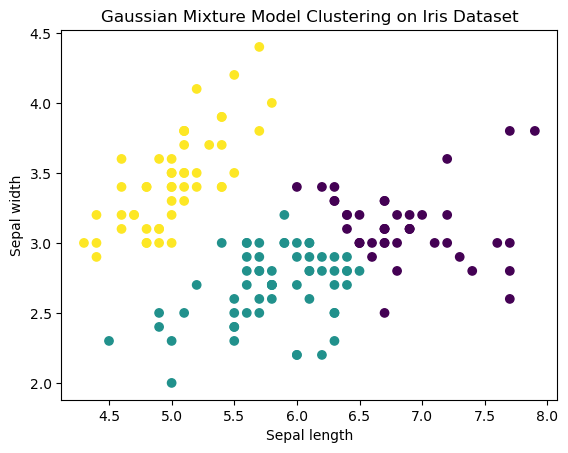

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Log-Likelihood: -1.4978006547501475


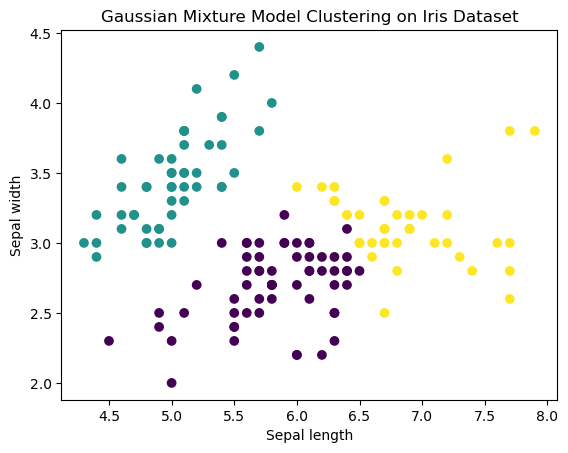

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Compute the log-likelihood of the data
log_likelihood = gmm.score(X)

# Print the log-likelihood
print("Log-Likelihood:", log_likelihood)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Log-Likelihood: -1.497800654750148
AIC: 483.3401964250444
BIC: 534.5209964246808


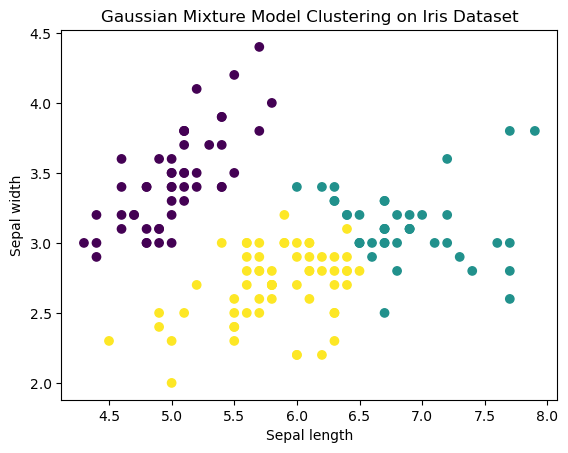

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Compute the log-likelihood of the data
log_likelihood = gmm.score(X)

# Compute AIC and BIC
n_samples, _ = X.shape
aic = gmm.aic(X) #AIC (Akaike Information Criterion)
bic = gmm.bic(X) #BIC (Bayesian Information Criterion)

# Print the evaluation metrics
print("Log-Likelihood:", log_likelihood)
print("AIC:", aic)
print("BIC:", bic)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()
